# Chapitre 8 : Piles et files

***Structure, implémentation et utilisation de piles et de files***

## Partie A - Piles

### Définition d'une classe `Pile`

On définit une classe `Pile` dont les instances possèdent :
- une méthode constructeur qui permet de **créer une pile vide**,
- une méthode `est_vide` qui **renvoit** `True` **si la pile est vide** et `False` sinon,
- une méthode `empiler` qui **ajoute au sommet de la pile** la valeur passée en argument,
- une méthode `depiler` qui **retire du sommet de la pile** une valeur et qui la renvoie,
- une méthode `__str__` qui permet l'affichage de la pile à l'écran.

<div class='rq'>Dans une pile (<i>stack</i> en anglais), les éléments sont retirés dans l'ordre inverse où ils sont ajoutés. On dit que le dernier entré est le premier sorti : <i>last in, first out</i> ou <b>LIFO</b>.</div>

Voici une implémentation possible de la classe `Pile`, qui utilise une liste Python (`list`) :

In [1]:
class Pile:
    def __init__(self):
        """
        Crée une pile vide.
        """
        self.liste = [] # Création d'une liste vide
    
    def est_vide(self):
        """
        Détermine si la pile est vide ou non.
        - Sortie : (booléen, True si la pile est vide, False sinon)
        """
        return self.liste == []

    def empiler(self, elem):
        """
        Ajoute un élément au sommet de la pile.
        - Entrée : elem (élément à ajouter)
        """
        self.liste.append(elem) # Ajout d'un élément à la fin de la liste
    
    def depiler(self):
        """
        Retire un élément du sommet de la pile et le renvoie.
        - Sortie : (élément retiré)
        """
        if self.est_vide():
            raise ValueError('la pile est vide')
        return self.liste.pop() # Retrait d'un élément à la fin de la liste
    
    def __str__(self):
        """
        Permet un affichage de la pile via la fonction print.
        """
        chaine = '|'
        for k in range(len(self.liste)):
            chaine += f" {self.liste[k]} |"
        return chaine

**(1)** Ecrire la spécification des méthodes définies ci-dessus.

**(2)** Ecrire une suite d'instructions permettant d'obtenir les affichages successifs suivants :

`|`

`True`

`| 4 | 0 | -1 |`

`-1`

`| 4 | 0 |`

`False`

In [2]:
ma_pile = Pile()
print(ma_pile)
print(ma_pile.est_vide())
ma_pile.empiler(4)
ma_pile.empiler(0)
ma_pile.empiler(-1)
print(ma_pile)
elem = ma_pile.depiler()
print(elem)
print(ma_pile)
print(ma_pile.est_vide())

|
True
| 4 | 0 | -1 |
-1
| 4 | 0 |
False


### Utilisation d'une pile pour effectuer des calculs écrits en notation polonaise inverse

La notation polonaise inverse (ou **notation postfixée**) permet d'écrire des calculs arithmétiques de façon non ambigüe et sans utiliser de parenthèses. Elle est une variante de la notation polonaise (**notation préfixée**) qui doit non nom au mathématicien polonais Jan Łukasiewicz qui l'a imaginée.

Le principe de la notation polonaise inverse est d'écrire l'opérateur à droite des deux opérandes.

Par exemple, on écrit `1 1 +` au lieu de `1 + 1` en notation traditionnelle (**notation infixée**).

De la même façon, on écrit `3 2 + 5 *` au lieu de `(3 + 2) * 5`.

L'écriture des calculs en notation polonaise inverse ne nécessite ni parenthèse, ni priorité opératoire.

**(3)** Réécrire les calculs suivants en utilisant la notation polonaise inverse :
- `4 - 2`

<div class='rq'>Le calcul <code>4 - 2</code> devient, en notation polonaise inverse : <code>4 2 -</code>.</div>

- `(6 / 3) * (5 - 2)`

<div class='rq'>Le calcul <code>(6 / 3) * (5 - 2)</code> devient, en notation polonaise inverse : <code>6 3 / 5 2 - *</code>.</div>

- `1 + 2 * 3`

<div class='rq'>Le calcul <code>1 + 2 * 3</code> devient, en notation polonaise inverse : <code>1 2 3 * +</code> ou encore <code>2 3 * 1 +</code>.</div>

- `(4 - (5 + 3)) * (2 + 2)`

<div class='rq'>Le calcul <code>(4 - (5 + 3)) * (2 + 2)</code> devient, en notation polonaise inverse : <code>4 5 3 + - 2 2 + *</code>.</div>

On suppose maintenant que les opérandes (sous forme d'entiers ou de flottants) et les opérateurs (sous forme de chaînes) sont stockés dans un tableau :

In [3]:
tab = [3, 2,'+', 5, '*']

L'algorithme suivant permet d'effectuer le calcul représenté en notation polonaise inverse dans un tableau `tab`.

<div class='rq3'>
<p><b>Algorithme pour effectuer un calcul représenté en notation polonaise inverse dans un tableau <code>tab</code></b></p>
<p><b>Début</b></p>
<p STYLE="padding:0 0 0 40px;"><code>p</code> ← pile vide</p>
<p STYLE="padding:0 0 0 40px;">Pour <code>k</code> allant de 0 à longueur(<code>tab</code>)-1</p>
<p STYLE="padding:0 0 0 80px;">Si <code>tab[k]</code> est un nombre alors</p>
    <p STYLE="padding:0 0 0 120px;">Empiler dans <code>p</code> le nombre <code>tab[k]</code></p>
<p STYLE="padding:0 0 0 80px;">Sinon</p>
<p STYLE="padding:0 0 0 120px;"><code>operateur</code> ← <code>tab[k]</code></p>
<p STYLE="padding:0 0 0 120px;"><code>b</code> ← Dépiler un élément de <code>p</code></p>
    <p STYLE="padding:0 0 0 120px;"><code>a</code> ← Dépiler un élément de <code>p</code></p>
<p STYLE="padding:0 0 0 120px;">Empiler dans <code>p</code> le résultat de l'opération <code>a operateur b</code></p>
<p STYLE="padding:0 0 0 80px;">Fin Si</p>
<p STYLE="padding:0 0 0 40px;">Fin Pour</p>
<p STYLE="padding:0 0 0 40px;"><code>resultat</code> ← Dépiler un élément de <code>p</code></p>
<p STYLE="padding:0 0 0 40px;">Vérifier que la pile <code>p</code> est vide, faute de quoi le <code>resultat</code> n'est pas correct</p>
<p><b>Fin</b></p>
</div>

**(4)** Définir une fonction `calcul_NPI` qui prend en paramètre d'entrée un tableau `tab` contenant un calcul représenté en notation polonaise inverse et qui retourne le résultat du calcul. Ecrire la spécification de la fonction ainsi qu'un jeu de tests.

In [4]:
def calcul_NPI(tab):
    """
    Effectue un calcul représenté en notation polonaise inverse dans un tableau.
    - Entrée : tab (tableau contenant des nombres et des caractères '+', '-', '*' et '/')
    - Sortie : resultat (nombre, résultat du calcul)
    
    >>> calcul_NPI([4, 2, '-'])
    2
    
    >>> calcul_NPI([6, 3, '/', 5, 2, '-', '*'])
    6.0
    
    >>> calcul_NPI([1, 2, 3, '*', '+'])
    7
    
    >>> calcul_NPI([4, 5, 3, '+', '-', 2, 2, '+', '*'])
    -16
    
    >>> calcul_NPI([4, 5, 3, '+'])
    Traceback (most recent call last):
        ...
    ValueError: le tableau passé en argument ne contient pas un calcul valide

    >>> calcul_NPI([])
    Traceback (most recent call last):
        ...
    ValueError: la pile est vide
    """
    p = Pile()
    for k in range(len(tab)):
        if type(tab[k]) in [int, float]:
            p.empiler(tab[k])
        else:
            b = p.depiler()
            a = p.depiler()
            if tab[k] == '+':
                p.empiler(a + b)
            elif tab[k] == '-':
                p.empiler(a - b)
            elif tab[k] == '*':
                p.empiler(a * b)
            elif tab[k] == '/':
                p.empiler(a / b)
    resultat = p.depiler()
    if p.est_vide():
        return resultat
    else:
        raise ValueError('le tableau passé en argument ne contient pas un calcul valide')

In [5]:
import doctest as dt
dt.run_docstring_examples(calcul_NPI, globals())

## Activité : La sortie du labyrinthe

### Représentation d'un labyrinthe en mémoire et à l'écran

On représente un labyrinthe par une grille rectangulaire dans laquelle les murs sont des cases noires et les passages des cases blanches. La grille est représentée en mémoire par un tableau `grille` à deux dimensions dont les éléments sont `O` pour un passage et `1` pour un mur.

<img src='https://ntoulzac.github.io/Cours-NSI-Terminale/piles_files/images/laby1.png' width='450px'>

**(5)** Définir `grille` pour le labyrinthe dessiné ci-dessus.

In [1]:
grille = [[1, 1, 1, 1, 1, 0, 1, 1, 1],
          [0, 0, 0, 0, 1, 0, 1, 0, 1],
          [1, 0, 1, 0, 1, 0, 1, 0, 1],
          [1, 0, 1, 0, 1, 0, 0, 0, 1],
          [1, 0, 1, 1, 1, 1, 1, 0, 1],
          [1, 0, 0, 0, 0, 0, 0, 0, 1],
          [1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [34]:
grille = [[1, 1, 1, 1, 1, 1, 1, 1, 1],
          [1, 0, 0, 0, 1, 0, 1, 0, 1],
          [1, 1, 1, 0, 1, 0, 1, 0, 1],
          [1, 0, 0, 0, 1, 0, 0, 0, 1],
          [1, 0, 1, 0, 1, 0, 1, 0, 1],
          [1, 0, 1, 0, 0, 0, 0, 0, 1],
          [1, 0, 1, 0, 1, 1, 1, 0, 1],
          [1, 0, 0, 0, 0, 0, 0, 0, 1],
          [1, 1, 1, 1, 1, 1, 1, 1, 1]]

On repère la position de chaque case par un p-uplet de la forme `(L, C)`, où `L` et `C` sont respectivement un numéro de ligne et de colonne.

**(6)** Définir deux p-uplets `entree` et `sortie` correspondant aux positions de l'entrée et de la sortie du labyrinthe dessiné ci-dessus.

In [35]:
entree = (1, 0)
sortie = (0, 5)

**(7)** Définir l'ébauche d'une classe `Labyrinthe` dont la méthode constructeur prend trois paramètres d'entrée : un tableau à deux dimensions (contenant le plan des passages et des murs) et deux p-uplets (position de l'entrée et de la sortie). Les attributs des instances de la classe `Labyrinthe` sont :
- `grille` : un tableau à deux dimensions contenant le plan des passages et des murs,
- `nb_l` : un entier correspondant au nombre de lignes de la grille,
- `nb_c` : un entier correspondant au nombre de colonnes de la grille,
- `entree` : un p-uplet correspondant à la position de l'entrée du labyrinthe,
- `sortie` : un p-uplet correspondant à la position de la sortie du labyrinthe.

In [36]:
class Labyrinthe:
    def __init__(self, tab, posE, posS):
        self.grille = tab
        self.nb_l = len(self.grille)
        self.nb_c = len(self.grille[0])
        self.entree = posE
        self.sortie = posS

**(8)** Importer le module `fenetre_laby` sous le nom `fl` puis afficher l'aide de la classe `FenetreLaby` définie dans ce même module.

In [37]:
import fenetre_laby as fl
help(fl.FenetreLaby)

Help on class FenetreLaby in module fenetre_laby:

class FenetreLaby(builtins.object)
 |  FenetreLaby(laby)
 |  
 |  Classe permettant de gérer une fenêtre pygame pour l'affichage d'un labyrinthe.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, laby)
 |      Ouvre une fenêtre pygame aux dimensions d'un labyrinthe.
 |      - Entrée : laby (instance de la classe Labyrinthe)
 |  
 |  actualiser(self, laby)
 |      Affiche dans la fenêtre pygame un labyrinthe.
 |      - Entrée : laby (instance de la classe Labyrinthe)
 |  
 |  afficher_case(self, pos, couleur, mise_a_jour=True)
 |      Colorie une case.
 |      - Entrées : pos (p-uplet de la forme (L, C) correspondant à la position de la case à colorer)
 |                  couleur (p-uplet de la forme (R, G, B))
 |                  mise_a_jour (booléen optionnel, True pour que la case soit colorée immédiatement, False sinon)
 |  
 |  effacer(self)
 |      Efface la fenêtre pygame en la remplissant de blanc.
 |  
 |  fermer(self)
 | 

**(9)** Créer une instance de la classe `Labyrinthe` correspondant au labyrinthe dessiné plus haut, puis faire afficher ce labyrinthe dans une fenêtre `pygame`.

In [38]:
nouvelle_grille = grille[:][:]
mon_laby = Labyrinthe(nouvelle_grille, entree, sortie)
ma_fenetre = fl.FenetreLaby(mon_laby)
ma_fenetre.actualiser(mon_laby)

**(10)** Fermer la fenêtre `pygame`.

In [33]:
ma_fenetre.fermer()

### Utilisation d'une pile pour rechercher la sortie du labyrinthe

On souhaite maintenant pouvoir trouver comment atteindre la sortie du labyrinthe à partir de l'entrée.

**(11)** Recopier ci-dessous la définition de la classe `Labyrinthe` en y ajoutant :
- une méthode `visiter_case`. Cette méthode prend en paramètre d'entrée un p-uplet `pos` de la forme `(L, C)` et une instance de la classe `FenetreLaby`. Elle remplace sur la ligne `L` et dans la colonne `C` de la `grille` le nombre `0` (case non encore visitée) par le nombre `2` (case déjà visitée). De plus, elle colorie en rouge la case en question, attend un quart de seconde puis la colorie en bleu.
- une méthode `voisines_non_visitees`. Cette méthode prend en paramètre d'entrée un p-uplet `pos` de la forme `(L, C)` et elle revoie le tableau composé des positions des cases qui sont voisines de `pos` (à droite, au dessus, au dessous, à gauche) et qui n'ont pas encore été visitées.

**(12)** Compléter le code de la méthode `parcourir`.

In [12]:
from time import sleep

class Labyrinthe:
    def __init__(self, tab, posE, posS):
        self.grille = tab
        self.nb_l = len(self.grille)
        self.nb_c = len(self.grille[0])
        self.entree = posE
        self.sortie = posS
        
    def visiter_case(self, pos, fen):
        (L, C) = pos
        self.grille[L][C] = 2
        fen.afficher_case(pos, fl.ROUGE)
        sleep(0.25)
        fen.afficher_case(pos, fl.BLEU)
    
    def voisines_non_visitees(self, pos):
        (L, C) = pos
        voisines = []
        for (a, b) in [(0, 1), (-1, 0), (1, 0), (0, -1)]:
            if 0 <= L+a < self.nb_l and 0 <= C+b < self.nb_c:
                if self.grille[L+a][C+b] == 0:
                    voisines.append((L+a, C+b))
        return voisines
    
    def parcourir(self, fenetre):
        (L, C) = self.entree # On se place à l'entrée du labyrinthe.
        pile = Pile() # On crée une pile vide.
        continuer_parcours = True
        while continuer_parcours:
            self.visiter_case((L, C), fenetre) # On visite la case (L, C).
            if (L, C) == self.sortie: # Si c'est la sortie alors...
                pile.empiler((L, C)) # ... on empile la position (L, C)...
                continuer_parcours = False # ... et le parcours se termine sur un succès.
            else: # Sinon...
                voisines = self.voisines_non_visitees((L, C)) # ... on liste les voisines de (L, C) non visitées.
                if voisines == []: # S'il n'y en a aucune...
                    if pile.est_vide(): # ... et que la pile est vide alors...
                        continuer_parcours = False # ... le parcours se termine sur un échec...
                    else:
                        (L, C) = pile.depiler() # ... sinon on dépile un élément pour revenir en arrière.
                else: # Si, par contre, il y a des voisines non visitées alors...
                    pile.empiler((L, C)) # on empile la position (L, C)...
                    (L, C) = voisines[0] # et on remplace (L, C) par une de ses voisines non visitées.
        return pile

In [13]:
from copy import deepcopy
nouvelle_grille = deepcopy(grille)
mon_laby = Labyrinthe(nouvelle_grille, entree, sortie)
ma_fenetre = fl.FenetreLaby(mon_laby)
ma_fenetre.actualiser(mon_laby)
mon_laby.parcourir(ma_fenetre)
ma_fenetre.fermer()

<div class='rq'>La fonction <code>deepcopy</code> du module <code>copy</code> permet de créer une copie du tableau à deux dimensions <code>grille</code>, et donc de ne pas modifier <code>grille</code> au cours du parcours du labyrinthe.</div>

### Approfondissement

On suppose maintenant que le plan du labyrinthe est stocké dans un fichier texte, comme dans les fichiers du répertoire `Grilles`. L'entrée du labyrinthe y est représentée par un caractère `E` et la sortie par un `S`.

**(13)** Définir une méthode `lire_fichier` prenant en paramètre d'entrée un `nom_de_fichier` sous forme de chaine de caractères et initialisant la `grille` et les p-uplets `entree` et `sortie` à partir du fichier.

In [14]:
class Labyrinthe:
    def __init__(self, nom_de_fichier):
        self.lire_fichier(nom_de_fichier)
        self.nb_l = len(self.grille)
        self.nb_c = len(self.grille[0])
        
    def lire_fichier(self, nom_de_fichier):
        with open(nom_de_fichier, 'r') as fichier:
            self.grille = []
            L = 0
            for chaine in fichier:
                ligne = []
                C = 0
                for car in chaine:
                    if car == 'E':
                        ligne.append(0)
                        self.entree = (L, C)
                    elif car == 'S':
                        ligne.append(0)
                        self.sortie = (L, C)
                    elif car == '0' or car == '1':
                        ligne.append(int(car))
                    C += 1
                self.grille.append(ligne)
                L += 1
    
    def visiter_case(self, pos, fen):
        (L, C) = pos
        self.grille[L][C] = 2
        fen.afficher_case(pos, fl.BLEU)
    
    def voisines_non_visitees(self, pos):
        (L, C) = pos
        voisines = []
        for (a, b) in [(0, 1), (-1, 0), (1, 0), (0, -1)]:
            if 0 <= L+a < self.nb_l and 0 <= C+b < self.nb_c:
                if self.grille[L+a][C+b] == 0:
                    voisines.append((L+a, C+b))
        return voisines
    
    def parcourir(self, fenetre):
        (L, C) = self.entree # On se place à l'entrée du labyrinthe.
        pile = Pile() # On crée une pile vide.
        continuer_parcours = True
        while continuer_parcours:
            self.visiter_case((L, C), fenetre) # On visite la case (L, C).
            if (L, C) == self.sortie: # Si c'est la sortie alors...
                pile.empiler((L, C)) # ... on empile la position (L, C)...
                continuer_parcours = False # ... et le parcours se termine sur un succès.
            else: # Sinon...
                voisines = self.voisines_non_visitees((L, C)) # ... on liste les voisines de (L, C) non visitées.
                if voisines == []: # S'il n'y en a aucune...
                    if pile.est_vide(): # ... et que la pile est vide alors...
                        continuer_parcours = False # ... le parcours se termine sur un échec...
                    else:
                        (L, C) = pile.depiler() # ... sinon on dépile un élément pour revenir en arrière.
                else: # Si, par contre, il y a des voisines non visitées alors...
                    pile.empiler((L, C)) # on empile la position (L, C)...
                    (L, C) = voisines[0] # et on remplace (L, C) par une de ses voisines non visitées.
        return pile

In [15]:
import fenetre_laby as fl
from time import sleep

In [16]:
def resoudre_laby(nom_de_fichier):
    laby = Labyrinthe(nom_de_fichier)
    fenetre = fl.FenetreLaby(laby)
    fenetre.actualiser(laby)
    pile = laby.parcourir(fenetre)
    while not pile.est_vide():
        pos = pile.depiler()
        fenetre.afficher_case(pos, fl.ROUGE)
    sleep(2)
    fenetre.fermer()

<div class='rq'>Lorsque le parcours du labyrinthe est terminé, on dépile toutes les positions stockées dans la <code>pile</code> et on affiche en rouge les cases correspondantes, faisant ainsi apparaître à l'écran le chemin qui mène de l'entrée à la sortie.</div>

In [18]:
resoudre_laby('Grilles/laby.txt')

In [19]:
for a in range(2):
    for b in range(1, 8):
        resoudre_laby(f"Grilles/laby{a}{b}.txt")

<img src='https://ntoulzac.github.io/Cours-NSI-Terminale/piles_files/images/laby11.png'><br>
<center><i>En rouge, le chemin menant de l'entrée à la sortie. En bleu, les impasses explorées lors du parcours.</i></center>

## Partie B - Files

### Définition d'une classe `File`

On définit une classe `File` dont les instances possèdent :
- une méthode constructeur qui permet de **créer une file vide**,
- une méthode `est_vide` qui **renvoit** `True` **si la file est vide** et `False` sinon,
- une méthode `enfiler` qui **ajoute à la fin de la file** (en queue de file) la valeur passée en argument,
- une méthode `defiler` qui **retire du début de la file** (en tête de file) une valeur et qui la renvoie,
- une méthode `__str__` qui permet l'affichage de la file à l'écran.

<div class='rq'>Dans une file (<i>queue</i> en anglais), les éléments sont retirés dans l'ordre où ils sont ajoutés. On dit que le premier entré est le premier sorti : <i>first in, first out</i> ou <b>FIFO</b>.</div>

Voici une implémentation possible de la classe `File`, qui utilise une liste Python (`list`) :

In [45]:
class File:
    def __init__(self):
        """
        Crée une file vide.
        """
        self.liste = [] # Création d'une liste vide
    
    def est_vide(self):
        """
        Détermine si la file est vide ou non.
        - Sortie : (booléen, True si la pile est vide, False sinon)
        """
        return self.liste == []

    def enfiler(self, elem):
        """
        Ajoute un élément en queue de file.
        - Entrée : elem (élément à ajouter)
        """
        self.liste.insert(0, elem) # Ajout d'un élément au début de la liste
    
    def defiler(self):
        """
        Retire un élément de la tête de la file et le renvoie.
        - Sortie : (élément retiré)
        """
        if self.est_vide():
            raise ValueError('la file est vide')
        return self.liste.pop() # Retrait d'un élément à la fin de la liste
    
    def __str__(self):
        """
        Permet un affichage de la file via la fonction print.
        """
        chaine = '|'
        for k in range(len(self.liste)):
            chaine += f" {self.liste[k]} |"
        return chaine

**(1)** Ecrire la spécification des méthodes définies ci-dessus.

**(2)** Ecrire une suite d'instructions permettant d'obtenir les affichages successifs suivants :

`|`

`True`

`| 4 | 0 | -1 |`

`-1`

`| 4 | 0 |`

`False`

In [21]:
ma_file = File()
print(ma_file)
print(ma_file.est_vide())
ma_file.enfiler(-1)
ma_file.enfiler(0)
ma_file.enfiler(4)
print(ma_file)
elem = ma_file.defiler()
print(elem)
print(ma_file)
print(ma_file.est_vide())

|
True
| 4 | 0 | -1 |
-1
| 4 | 0 |
False


**(3)** Ecrire une suite d'instructions permettant d'obtenir les affichages successifs suivants :

`| 3 | 2 | 1 |`

`| 5 | 4 | 3 | 2 |`

`| 6 | 5 |`

In [22]:
ma_file = File()
ma_file.enfiler(1)
ma_file.enfiler(2)
ma_file.enfiler(3)
print(ma_file)
ma_file.defiler()
ma_file.enfiler(4)
ma_file.enfiler(5)
print(ma_file)
ma_file.defiler()
ma_file.enfiler(6)
ma_file.defiler()
ma_file.defiler()
print(ma_file)

| 3 | 2 | 1 |
| 5 | 4 | 3 | 2 |
| 6 | 5 |


### Autre définition de la classe `File` à partir de deux piles

Il est possible d'implémenter différemment la classe `File` en utilisant deux piles :
- La première pile est appelée la pile d'entrée.
- La seconde pile est appelée la pile de sortie.
- Une file vide est représentée par deux piles vides.
- Pour faire entrer un élément dans la file, on l'empile au sommet de la pile d'entrée.
- Pour faire sortir un élément de la file, on dépile le sommet de la pile de sortie. Si cette dernière est vide, on y transfère tous les éléments présents dans la pile d'entrée en les dépilant de la pile d'entrée et en les empilant dans la pile de sortie.

**(4)** Donner une implémentation de la classe `File` utilisant deux piles.

In [23]:
class File:
    def __init__(self):
        """
        Crée une file vide.
        """
        self.entree = Pile() # Création d'une pile vide pour gérer les entrées dans la file
        self.sortie = Pile() # Création d'une pile vide pour gérer les sorties de la file
    
    def est_vide(self):
        """
        Détermine si la file est vide ou non.
        - Sortie : (booléen, True si la file est vide, False sinon)
        """
        return self.entree.est_vide() and self.sortie.est_vide()

    def enfiler(self, elem):
        """
        Ajoute un élément à la fin de la file.
        - Entrée : elem (élément à ajouter)
        """
        self.entree.empiler(elem) # Ajout d'un élément au sommet de la pile d'entrée

    def defiler(self):
        """
        Retire un élément au début de la file et le renvoie.
        - Sortie : (élément retiré)
        """
        if self.est_vide():
            raise ValueError('la file est vide')
        elif self.sortie.est_vide():
            while not self.entree.est_vide(): # Transfert des éléments de la pile d'entrée...
                self.sortie.empiler(self.entree.depiler()) # ... vers la pile de sortie
        return self.sortie.depiler() # Retrait d'un élément au sommet de la pile de sortie

## Activité : Le problème de Josèphe

Voici un extrait du livre *Problèmes plaisants & délectables qui se font par les nombres* publié en 1624 par Claude-Gaspard Bachet. L'auteur fait référence à un épisode de la vie de Flavius Josèphe lors de la guerre judéo-romaine en l'an 67, au cours duquel Josèphe et quarante soldats juifs se trouvent piégés dans une grotte par l'armée romaine. Ils décident alors de s'entretuer plutôt que de se rendre aux romains.

<img src='https://ntoulzac.github.io/Cours-NSI-Terminale/piles_files/images/josephe_bachet_1624.jpg' width='500px'>

De façon moins sanglante, on dispose `n` nombres en cercle, et on décide d'éliminer un nombre sur `p` jusqu'à ce qu'il ne reste qu'un seul nombre. Le **problème de Josèphe** consiste à trouver, en fonction de la valeur de `n` et de `p`, quel nombre est éliminé en dernier.

<img style="border: 0.2em solid black" src='https://ntoulzac.github.io/Cours-NSI-Terminale/piles_files/images/josephe_41_3.gif'><center><br><i>Illustration dans le cas où <code>n</code> vaut 41 et <code>p</code> vaut 3.</i></center>

La fonction `visualiser` du module `josephe` permet d'illustrer dans une fenêtre pygame la solution du problème de Josèphe pour deux valeurs `n` et `p` passées en argument.

In [24]:
from josephe import visualiser
help(visualiser)

Help on function visualiser in module josephe:

visualiser(n, p, gif=False)
    Affiche la solution du problème de Josèphe pour n et p dans une fenêtre pygame.
    - Entrées : n, p (entiers strictement positifs)
                gif (booléen, True pour enregistrer la solution sous forme de gif, False par défaut)



**(5)** Ecrire la ligne de code permettant de visualiser la solution du problème de Josephe pour `n` valant 41 et `p` valant 3. Visualiser ensuite la solution du problème pour d'autres valeurs de `n` et `p`.

In [25]:
visualiser(41, 3)

<table class="sobre">
    <tr>
        <td><img style="border: 0.2em solid black" src='https://ntoulzac.github.io/Cours-NSI-Terminale/piles_files/images/josephe_16_2.gif'><center><br><i>Illustration dans le cas où <code>n</code> vaut 16 et <code>p</code> vaut 2.</i></center></td>
        <td><img style="border: 0.2em solid black" src='https://ntoulzac.github.io/Cours-NSI-Terminale/piles_files/images/josephe_24_2.gif'><center><br><i>Illustration dans le cas où <code>n</code> vaut 24 et <code>p</code> vaut 2.</i></center></td>
            <td><img style="border: 0.2em solid black" src='https://ntoulzac.github.io/Cours-NSI-Terminale/piles_files/images/josephe_13_3.gif'><center><br><i>Illustration dans le cas où <code>n</code> vaut 13 et <code>p</code> vaut 3.</i></center></td>
    </tr>
</table>

**(6)** En utilisant une file, définir une fonction `josephe` renvoyant la solution du problème de Josèphe correspondant aux nombres `n` et `p` passés en argument. Ecrire la spécification de la fonction ainsi qu'un jeu de tests.

In [26]:
def josephe(n, p):
    """
    Détermine la solution du problème de Josèphe pour n et p, c'est-à-dire quel est le dernier nombre
    non éliminé lorsqu'on en élimine 1 sur p à partir de n nombres au départ (numérotés de 1 à n).
    - Entrées : n, p (entiers strictement positifs)
    - Sortie : (entier, solution du problème de Josèphe pour n et p)
    
    >>> josephe(16, 2)
    1
    
    >>> josephe(24, 2)
    17
    
    >>> josephe(13, 3)
    13
    
    >>> josephe(41, 3)
    31
    """
    f = File()
    for k in range(1, n+1):
        f.enfiler(k)
    while not f.est_vide():
        for k in range(p-1):
            f.enfiler(f.defiler())
        elimine = f.defiler()
    return elimine

In [27]:
import doctest as dt
dt.run_docstring_examples(josephe, globals())

**(7)** Pour tout entier `n` compris entre 1 et 64, afficher `josephe(n, 2)`.

In [28]:
for n in range(1, 65):
    print(f"{n} --> {josephe(n, 2)}")

1 --> 1
2 --> 1
3 --> 3
4 --> 1
5 --> 3
6 --> 5
7 --> 7
8 --> 1
9 --> 3
10 --> 5
11 --> 7
12 --> 9
13 --> 11
14 --> 13
15 --> 15
16 --> 1
17 --> 3
18 --> 5
19 --> 7
20 --> 9
21 --> 11
22 --> 13
23 --> 15
24 --> 17
25 --> 19
26 --> 21
27 --> 23
28 --> 25
29 --> 27
30 --> 29
31 --> 31
32 --> 1
33 --> 3
34 --> 5
35 --> 7
36 --> 9
37 --> 11
38 --> 13
39 --> 15
40 --> 17
41 --> 19
42 --> 21
43 --> 23
44 --> 25
45 --> 27
46 --> 29
47 --> 31
48 --> 33
49 --> 35
50 --> 37
51 --> 39
52 --> 41
53 --> 43
54 --> 45
55 --> 47
56 --> 49
57 --> 51
58 --> 53
59 --> 55
60 --> 57
61 --> 59
62 --> 61
63 --> 63
64 --> 1


**(8)** Conjecturer, en fonction de `n`, quelle est la solution du problème de Josèphe dans le cas où `p` vaut 2.

<div class='rq'>La solution du problème de Josèphe (dans le cas où <code>p</code> vaut 2) semble être le nombre <code>2*(n-A)+1</code>, où <code>A</code> désigne la plus grande puissance de 2 inférieure ou égale à <code>n</code>.</div>

## Activité : La patience des usagers au guichet

On considère un guichet unique ouvert pendant huit heures consécutives sur une journée, soit 28800 secondes.

Les usagers qui arrivent prennent un ticket numéroté et commencent à faire la queue. On note `p` la probabilité qu'un nouvel usager arrive pendant un intervalle de temps d'une seconde.

Lorsque c'est son tour d'avoir accès au guichet, le temps que l'usager y passe est un nombre de secondes aléatoire compris entre 30 et 300. On considère que tous les nombres compris entre 30 et 300 ont la même probabilité d'apparaître.

Si le temps d'attente est trop long, un usager peut partir avant d'avoir eu accès au guichet. La patience de l'usager est un nombre de secondes aléatoire compris etre 120 et 1800. On considère que tous les nombres compris entre 120 et 1800 ont la même probabilité d'apparaître.

Le but de cette activité est de simuler une journée d'activité de ce guichet et de calculer, en fonction de `p`, quelle est la proportion des usagers qui sont repartis sans avoir été servis.

**(9)** Définir une classe `Usager` dont les instances possèdent trois attributs et une méthode :
- l'attribut `num` : le numéro du ticket attribué à l'usager à son arrivée dans la file d'attente, passé en argument de la méthode constructeur,
- l'attribut `tps_arr` : l'instant où l'usager arrive dans la file d'attente, exprimé en nombre de secondes écoulées depuis l'ouverture du guichet, passé en argument de la méthode constructeur,
- l'attribut `patience` : le nombre de secondes que l'usager accepte de passer dans la file d'attente, tiré au hasard entre 120 et 1800),
- la méthode `est_parti` : elle prend en entrée un instant `tps` (exprimé en nombre de secondes écoulées depuis l'ouverture du guichet) et elle retourne `True` si l'usager n'a pas eu la patience d'attendre jusque là, et `False` sinon.

In [29]:
from random import random, randint

In [30]:
class Usager:
    def __init__(self, num_ticket, tps_arrivee):
        self.num = num_ticket
        self.tps_arr = tps_arrivee
        self.patience = randint(120, 1800)
    
    def est_parti(self, tps):
        return tps > self.tps_arr + self.patience

**(10)** Définir une classe `Guichet` dont les instances possèdent trois attributs et trois méthodes :
- l'attribut `nb_tickets` : le nombre de tickets distribués depuis l'ouverture du guichet,
- l'attribut `nb_non_servis` : le nombre d'usagers partis sans avoir été servis,
- l'attribut `tps_libre` : le prochain instant où le guichet sera libre, exprimé en nombre de secondes écoulées depuis l'ouverture du guichet,
- la méthode `est_libre` : elle prend en entrée un instant `tps`, et elle permet de savoir si le guichet est libre ou non,
- la méthode `nouveau_dans_file` : elle prend en entrée une file `f` et un instant `tps`, et elle permet d'accueillir un nouvel usager dans la file d'attente,
- la méthode `servir` : elle prend en entrée un instant `tps`, et elle permet d'actualiser le prochain instant où le guichet sera libre.

In [31]:
class Guichet:
    def __init__(self):
        self.nb_tickets = 0
        self.nb_non_servis = 0
        self.tps_libre = 0
    
    def est_libre(self, tps):
        return tps >= self.tps_libre
    
    def nouveau_dans_file(self, f, tps):
        f.enfiler(Usager(self.nb_tickets, tps))
        self.nb_tickets = self.nb_tickets + 1
    
    def servir(self, tps):
        self.tps_libre = tps + randint(30, 300)

**(11)** Compléter la définition de la fonction `proportion_non_servis` :

In [32]:
def proportion_non_servis(p):
    """
    Simule une file d'attente au guichet sur une journée et calcule le taux d'usagers repartis sans avoir été servis.
    - Entrée : p (flottant compris entre 0 et 1, probabilité qu'un usager arrive dans la file pendant une seconde donnée)
    - Sortie : (flottant, proportion d'usagers repartis sans avoir été servis)
    """
    if not 0 < p <= 1: # assertion : p doit être dans l'intervalle ]0;1]
        raise ValueError('l\'argument doit être une probabilité non nulle')
    f = File() # création d'une file vide
    guichet = Guichet() # création d'une instance de la classe Guichet
    for tps in range(28800): # on parcourt les 28800 secondes où le guichet est ouvert
        if random() < p: # condition vraie avec une probabilité égale à p
            guichet.nouveau_dans_file(f, tps) # un nouvel usager se présente dans la file
        if guichet.est_libre(tps) and not f.est_vide(): # si le guichet est libre et la file n'est pas vide alors...
            usager = f.defiler() # ... un numéro de ticket est appelé au guichet...
            if usager.est_parti(tps):
                guichet.nb_non_servis = guichet.nb_non_servis + 1
            else:
                guichet.servir(tps)
    while not f.est_vide(): # les usagers qui sont toujours dans la file à la fermeture...
        f.defiler() # ... repartent sans avoir été servis
        guichet.nb_non_servis = guichet.nb_non_servis + 1
    return guichet.nb_non_servis / guichet.nb_tickets

**(12)** Effectuer une simulation dans laquelle il y a 1% de chance qu'un usager se présente pendant chaque seconde et afficher la proportion d'usagers repartis sans avoir été servis.

In [33]:
proportion_non_servis(0.01)

0.4470198675496689

**(13)** Effectuer une simulation dans laquelle un nouvel usager se présente en moyenne toutes les deux minutes et afficher la proportion d'usagers repartis sans avoir été servis.

In [34]:
proportion_non_servis(1/120)

0.3484848484848485

**(14)** En exécutant les trois cellules suivantes, représenter graphiquement 1000 simulations : sur l'axe des abscisses `p`, sur l'axe des ordonnées la proportion d'usagers repartis sans avoir été servis.

In [35]:
X = []
Y = []
for val in range(1, 201):
    p = val/4000
    for _ in range(5):
        X.append(p)
        Y.append(proportion_non_servis(p))

In [36]:
import matplotlib.pyplot as plt

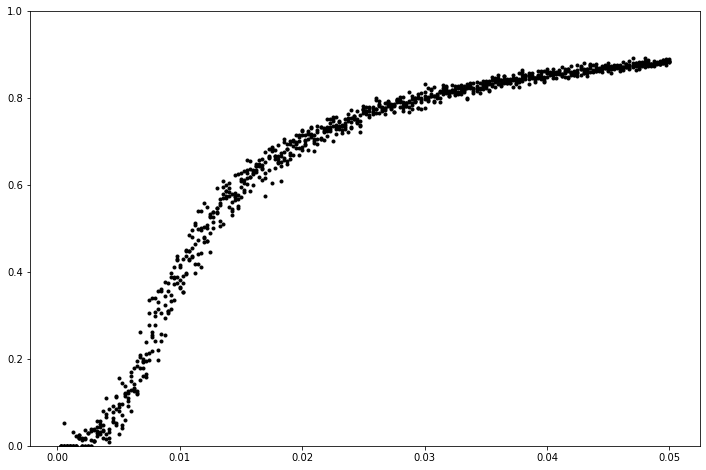

In [37]:
plt.figure(figsize = (12, 8))
plt.ylim(0, 1)
plt.plot(X, Y, 'k.')
plt.show()

## Activité : Une implémentation des piles et des files avec une liste chaînée

**(8)** Proposer une implémentation d'une classe `Pile` utilisant une liste chaînée.

In [1]:
from structures_lineaires import Liste

In [2]:
class Pile:
    def __init__(self):
        self.liste = Liste(None)
    
    def est_vide(self):
        return self.liste.est_vide()
    
    def empiler(self, elem):
        self.liste.inserer_en_tete(elem)
    
    def depiler(self):
        if self.est_vide():
            raise ValueError('la pile est vide')
        elem = self.liste.tete()
        self.liste.supprimer_en_tete()
        return elem
    
    def __str__(self):
        return '(sommet)  ' + str(self.liste) + '(bas)'

In [3]:
p = Pile()
for k in range(5):
    p.empiler(k)
print(p)
for k in range(2):
    val = p.depiler()
print(p)

(sommet)  4  3  2  1  0  (bas)
(sommet)  2  1  0  (bas)


**(9)** Proposer une implémentation d'une classe `File` utilisant une liste chaînée.

In [4]:
class File:
    def __init__(self):
        self.liste = Liste(None)
    
    def est_vide(self):
        return self.liste.est_vide()
    
    def enfiler(self, elem):
        n = self.liste.nb_elements()
        self.liste.inserer(elem, n)
    
    def defiler(self):
        if self.est_vide():
            raise ValueError('la file est vide')
        elem = self.liste.tete()
        self.liste.supprimer_en_tete()
        return elem
    
    def __str__(self):
        return '(sortie)  ' + str(self.liste) + '(entrée)'

In [5]:
f = File()
for k in range(5):
    f.enfiler(k)
print(f)
for k in range(2):
    val = f.defiler()
print(f)

(sortie)  0  1  2  3  4  (entrée)
(sortie)  2  3  4  (entrée)


## Exercices

### Exercice 1

**(1)** Définir une fonction `parentheses_ok` prenant en paramètre d'entrée une chaîne de caractères et retournant `True` si la chaîne de caractères est correctement parenthésée et `False` sinon. Ecrire la spécification de la fonction ainsi qu'un jeu de tests.

In [38]:
def parentheses_ok(chaine):
    """
    Vérifie le parenthésage d'une chaîne de caractères.
    - Entrée : chaine (chaine de caractères à vérifier)
    - Sortie : (booléen, True si la chaîne est correctement parenthésée, False sinon)
    
    >>> parentheses_ok('()')
    True
    
    >>> parentheses_ok('())')
    False
    
    >>> parentheses_ok('(()()')
    False

    >>> parentheses_ok('Chaine sans parenthèse')
    True
    """
    pile = Pile()
    for car in chaine:
        if car == '(':
            pile.empiler(car)
        elif car == ')':
            if pile.est_vide():
                return False
            else:
                par = pile.depiler()
                if par != '(':
                    return False
    return pile.est_vide()

In [39]:
dt.run_docstring_examples(parentheses_ok, globals())

**(2)** Modifier la définition de la fonction `parentheses_ok` pour la généraliser aux crochets et aux accolades.

In [40]:
def parentheses_ok(chaine):
    """
    Vérifie le parenthésage d'une chaîne de caractères.
    - Entrée : chaine (chaine de caractères à vérifier)
    - Sortie : (booléen, True si la chaîne est correctement parenthésée, False sinon)
    
    >>> parentheses_ok('()[]{}')
    True
    
    >>> parentheses_ok('([)]')
    False
    
    >>> parentheses_ok('[mot, (phrase)]')
    True

    >>> parentheses_ok('Chaine }sans{ [parenthèse]')
    False
    """
    associations = {')' : '(', ']' : '[', '}' : '{'}
    pile = Pile()
    for car in chaine:
        if car in '([{':
            pile.empiler(car)
        elif car in ')]}':
            if pile.est_vide():
                return False
            else:
                par = pile.depiler()
                if par != associations[car]:
                    return False
    return pile.est_vide()

In [41]:
dt.run_docstring_examples(parentheses_ok, globals())

### Exercice 2

Ecrire une fonction `inverser_file` prenant en entrée une file et retournant une nouvelle file dans laquelle les éléments sont dans l'ordre inverse de la première file. On n'utilisera que des piles ou des files et leurs méthodes associées.

In [42]:
def inverser_file(f):
    """
    Inverse une file (le premier élément passe en dernier, et ainsi de suite).
    - Entrée : f (instance de la classe File)
    - Sortie : f (instance de la classe File)
    - Effet de bord : Modifie la file f
    """
    p = Pile()
    while not f.est_vide():
        p.empiler(f.defiler())
    while not p.est_vide():
        f.enfiler(p.depiler())
    return f

In [51]:
ma_file = File()
for k in range(10):
    ma_file.enfiler(k)
print(ma_file)

| 9 | 8 | 7 | 6 | 5 | 4 | 3 | 2 | 1 | 0 |


In [52]:
mon_autre_file = inverser_file(ma_file)
print(mon_autre_file)

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |


### Exercice 3

Ecrire une fonction `separer_pairs` prenant en entrée une file contenant des entiers et retournant une nouvelle file dans laquelle les éléments pairs sont placés en tête de file et les éléments impairs en queue de file.

In [48]:
def separer_pairs(f):
    """
    Sépare les éléments pairs des éléments impairs dans une file. Les pairs sont mis en tête et les impairs en queue.
    - Entrée : f (instance de la classe File)
    - Sortie : f (instance de la classe File)
    - Effet de bord : Modifie la file f
    """
    f_pairs = File()
    f_impairs = File()
    while not f.est_vide():
        elem = f.defiler()
        if elem % 2 == 0:
            f_pairs.enfiler(elem)
        else:
            f_impairs.enfiler(elem)
    while not f_pairs.est_vide():
        f.enfiler(f_pairs.defiler())
    while not f_impairs.est_vide():
        f.enfiler(f_impairs.defiler())
    return f

In [53]:
ma_file = File()
for k in range(10):
    ma_file.enfiler(k)
print(ma_file)

| 9 | 8 | 7 | 6 | 5 | 4 | 3 | 2 | 1 | 0 |


In [54]:
mon_autre_file = separer_pairs(ma_file)
print(mon_autre_file)

| 9 | 7 | 5 | 3 | 1 | 8 | 6 | 4 | 2 | 0 |
